In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Preprocesing Data

## Snakes
A snake is a deformable spline which seeks to minimize an energy function defined over the arclength of a closed curve the energy function is defined in such away that the minimum value occurs when the curve accurately corresponds to the boundary of a cell nucleus

## Nuclear features

| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| Radius        | Te radius of an individual nucleus is measured by averaging the length of the radial line segments defined by the centroid of the snake and the individual snale points.|
| Perimeter     | The total distance between the snake points constitutes the nulear perimeter.|
| Area          | Nuclear area is measured simply by counting the number of pixels on the interior of the snake and adding one-half of the pixels in the perimeter.    |
| Compactness   | Perimeter and area are combined to give a measure of the compactness of the cell nuclei using the formula $\frac{{perimeter}^2}{area}$.   |
| Smoothness    | The difference between the length of a radial line and the mean lenth of the lines surrounding it. |
| Concavity     | Chords between non-adjacent snake points and measure the extent to which the actual boundary of the nucleus lies on the inside of each chord (Smaller chords better capture small concavities).  |
| Concave Points | Similar to Concavity but measures only the number, rather than the magnitude, of contour concavities.  |
| Symmetry      | In order to measure symetry, the major axis, or longest chord through the center, is found. Then measure the length difference between lines perpendicular to the major axis to the cell boundary in both directions.    |
| Fractal Dimension| Fractal Dimension is estimated using Mandelbrot's coastline method; higher values indicate more irregular contours and higher malignancy probability.      |
| Texture       | Texture is measure by finding the variance of the gray scale intensities in the component pixels.   |

In [4]:
data = load_breast_cancer()

In [6]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
svm = SVC()
knn = KNeighborsClassifier()
dt  = DecisionTreeClassifier()
rf  = RandomForestClassifier()
gb  = GradientBoostingClassifier()
nn = MLPClassifier(max_iter=1000) # Redes neuronales

## Entrenamiento y evaluación

In [226]:
def plot_classification_report(y_true, y_pred, target_names=None, name='' ,figsize=(10, 4)):
    """
    Crea heatmap de métricas y matriz de confusión del classification report
    """
    # Obtener el classification report como diccionario
    report = classification_report(y_true, y_pred, output_dict=True)
    # Preparar datos para graficar
    if target_names is None:
        classes = ['Class 0', 'Class 1']
    else:
        classes = target_names
    
    metrics = ['precision', 'recall', 'f1-score']
    
    # Extraer valores para cada clase
    class_0_values = [report['0'][metric] for metric in metrics]
    class_1_values = [report['1'][metric] for metric in metrics]
    
    subtitle = f'Classification Report {name}'
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(subtitle, fontsize=16, fontweight='bold')
    
    # 1. Heatmap de métricas
    metrics_data = np.array([class_0_values, class_1_values])
    sns.heatmap(metrics_data, annot=True, fmt='.3f', 
                xticklabels=metrics, yticklabels=classes,
                cmap='Blues', ax=axes[0], cbar_kws={'label': 'Score'})
    axes[0].set_title('Heatmap de Métricas')
    
    # 2. Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes,
                ax=axes[1])
    axes[1].set_title('Matriz de Confusión')
    axes[1].set_xlabel('Predicho')
    axes[1].set_ylabel('Real')
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir métricas generales
    print(f"Accuracy: {report['accuracy']:.3f}")
    print(f"Macro Avg - Precision: {report['macro avg']['precision']:.3f}")
    print(f"Macro Avg - Recall: {report['macro avg']['recall']:.3f}")
    print(f"Macro Avg - F1-Score: {report['macro avg']['f1-score']:.3f}")


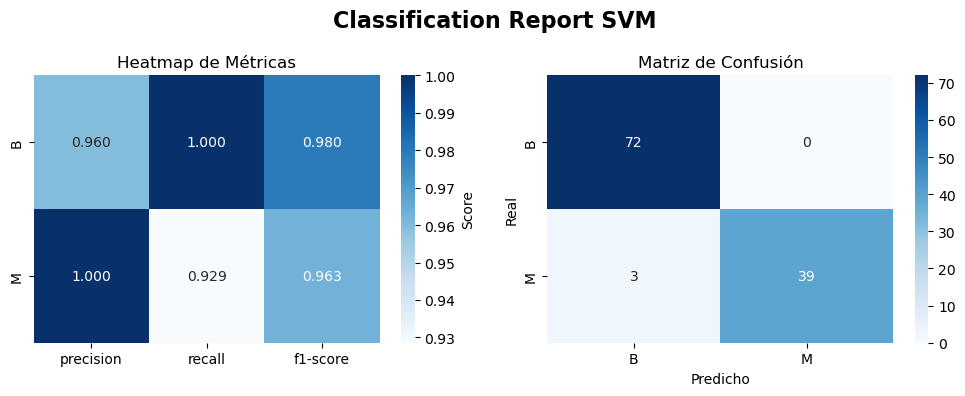

Accuracy: 0.974
Macro Avg - Precision: 0.980
Macro Avg - Recall: 0.964
Macro Avg - F1-Score: 0.971


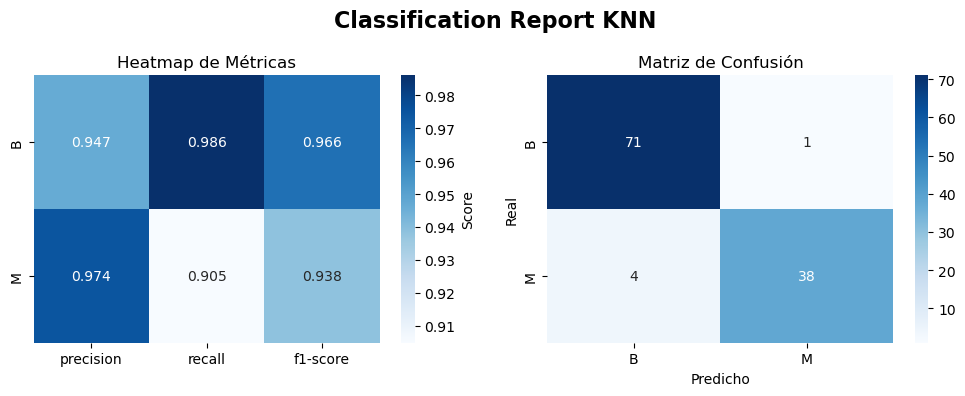

Accuracy: 0.956
Macro Avg - Precision: 0.961
Macro Avg - Recall: 0.945
Macro Avg - F1-Score: 0.952


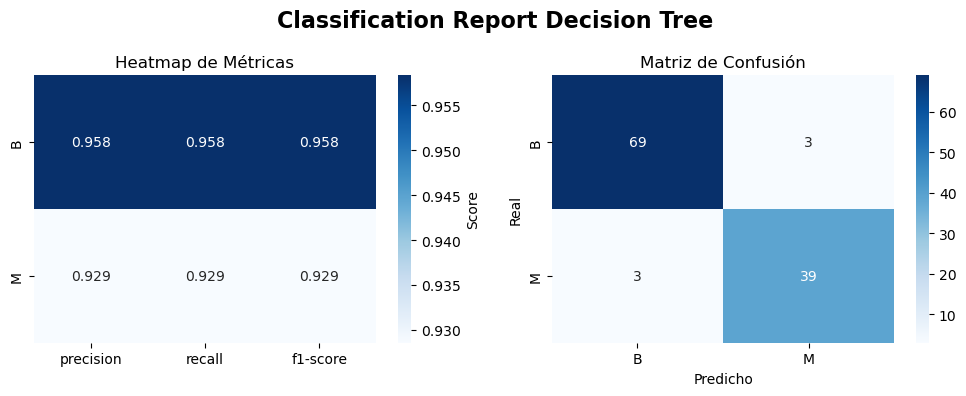

Accuracy: 0.947
Macro Avg - Precision: 0.943
Macro Avg - Recall: 0.943
Macro Avg - F1-Score: 0.943


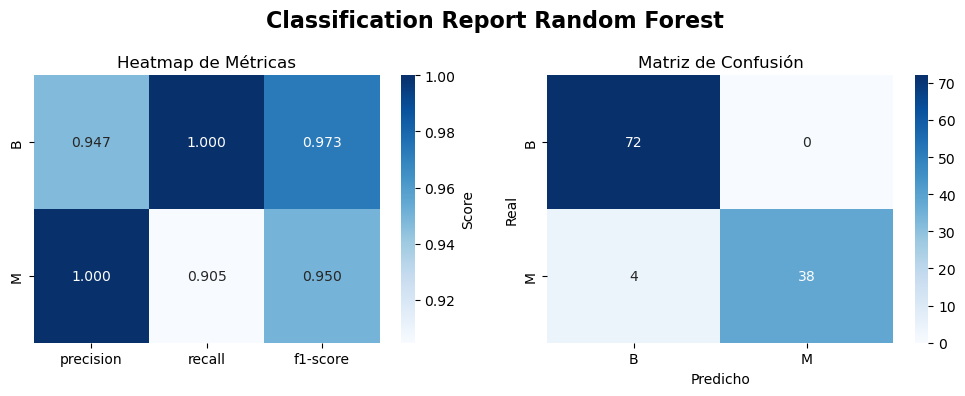

Accuracy: 0.965
Macro Avg - Precision: 0.974
Macro Avg - Recall: 0.952
Macro Avg - F1-Score: 0.961


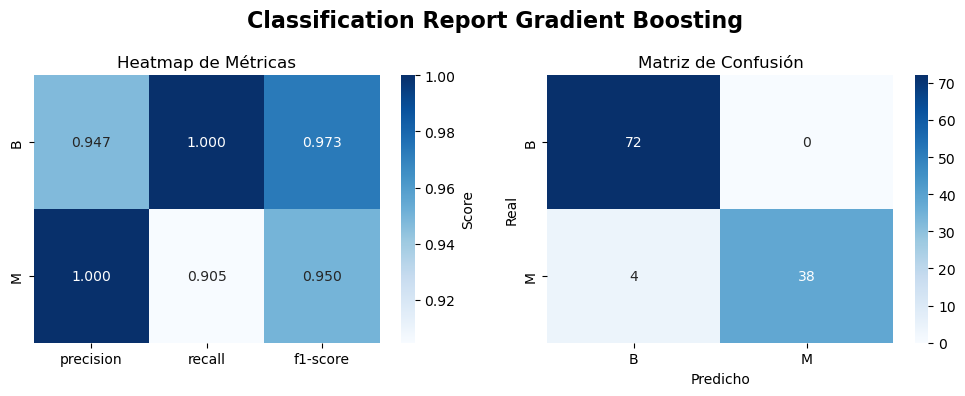

Accuracy: 0.965
Macro Avg - Precision: 0.974
Macro Avg - Recall: 0.952
Macro Avg - F1-Score: 0.961


In [228]:
from sklearn.metrics import classification_report

modelos = {
    "SVM": svm,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Neural Network": nn
}

for name, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    plot_classification_report(y_test,y_pred,['B', 'M'],name)

## Crear un ensamble

In [118]:
# Crear un ensamble de votación
voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('knn', knn),
        ('dt', dt),
        ('rf', rf),
        ('gb', gb),
        ('nn', nn)
    ],
    voting='hard'
)

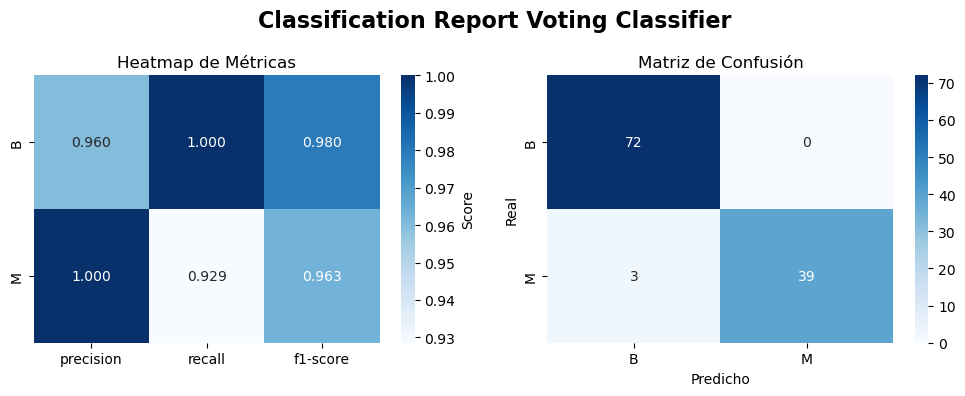

Accuracy: 0.974
Macro Avg - Precision: 0.980
Macro Avg - Recall: 0.964
Macro Avg - F1-Score: 0.971


In [232]:
# Entrenar y evaluar el ensamble
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
plot_classification_report(y_test,y_pred_ensemble,['B', 'M'],'Voting Classifier')